# Include Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt

# Read CSV files

In [2]:
trainset = pd.read_csv('./Training_Testing_Data/big_trainset.csv', index_col=[0])
trainset

,An Hải Bắc,An Hải Tây,An Hải Đông,An Khê,Area,Bình Hiên,Bình Thuận,Chính Gián,Hòa An,Hòa Châu,...,Thanh Khê Tây,Thanh Khê Đông,Thuận Phước,Thạc Gián,Thạch Thang,Thọ Quang,Tân Chính,Unknown_W,Vĩnh Trung,Xuân Hà
0,0.0,0.0,0.0,0.0,0.208589,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.294479,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.294479,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.171779,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.233129,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7841,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7842,0.0,0.0,0.0,0.0,0.184049,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7843,0.0,0.0,0.0,0.0,0.233129,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7844,0.0,0.0,0.0,0.0,0.331288,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
X_train = trainset.drop(columns='Price')
y_train = trainset.Price

In [4]:
testset = pd.read_csv('./Training_Testing_Data/big_testset.csv', index_col=[0])
testset

,An Hải Bắc,An Hải Tây,An Hải Đông,An Khê,Area,Bình Hiên,Bình Thuận,Chính Gián,Hòa An,Hòa Châu,...,Thanh Khê Tây,Thanh Khê Đông,Thuận Phước,Thạc Gián,Thạch Thang,Thọ Quang,Tân Chính,Unknown_W,Vĩnh Trung,Xuân Hà
0,0.0,0.0,0.0,0.0,0.294479,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.355828,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.282209,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.282209,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1957,0.0,0.0,0.0,0.0,0.233129,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1958,0.0,0.0,0.0,0.0,0.294479,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1959,0.0,0.0,0.0,0.0,0.208589,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1960,0.0,0.0,0.0,0.0,0.294479,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [5]:
X_test = testset.drop(columns='Price')
y_test = testset.Price

# Predicting

In [6]:
evaluation = pd.DataFrame()

In [7]:
def get_predict_value(algo):
    algo.fit(X_train, y_train)
    y_pred_train = algo.predict(X_train).reshape(-1, 1)
    y_pred_test = algo.predict(X_test).reshape(-1, 1)
    
    return y_pred_train, y_pred_test 

In [8]:
def get_score(name, type_params, name_set, original, pred):
    rmse = mean_squared_error(original, pred, squared = False)
    r_squared = r2_score(original, pred, multioutput='variance_weighted')
    mape = mean_absolute_percentage_error(original, pred)
    mae = mean_absolute_error(original, pred)

    score = pd.Series({'model': name,
                    'parameters': type_params,
                    'set': name_set,
                    'RMSE': "{:.2f}".format(rmse),
                    'R-squared': "{:.2f}".format(r_squared),
                    'MAPE': "{:.2f}".format(mape),
                    'MAE': "{:.2f}".format(mae)})
    
    return score.to_frame()

In [9]:
def visualizing(type_params, name_set, original, pred):
    x_ax = range(len(pred))
    plt.figure(figsize=(20,8))
    plt.title('100 predicted results on ' + name_set + ' with ' + type_params + ' hyperparameters' )
    plt.plot(x_ax[:100], original[:100], color="blue", label="original")
    plt.plot(x_ax[:100], pred[:100], color="red", label="predicted")
    plt.legend()
    plt.show()

## Light GBM 

### Default Hyperparameters

In [10]:
lightgb = lgb.LGBMRegressor()
y_pred_train, y_pred_test = get_predict_value(lightgb)

#### Score and Visualize results on Trainset

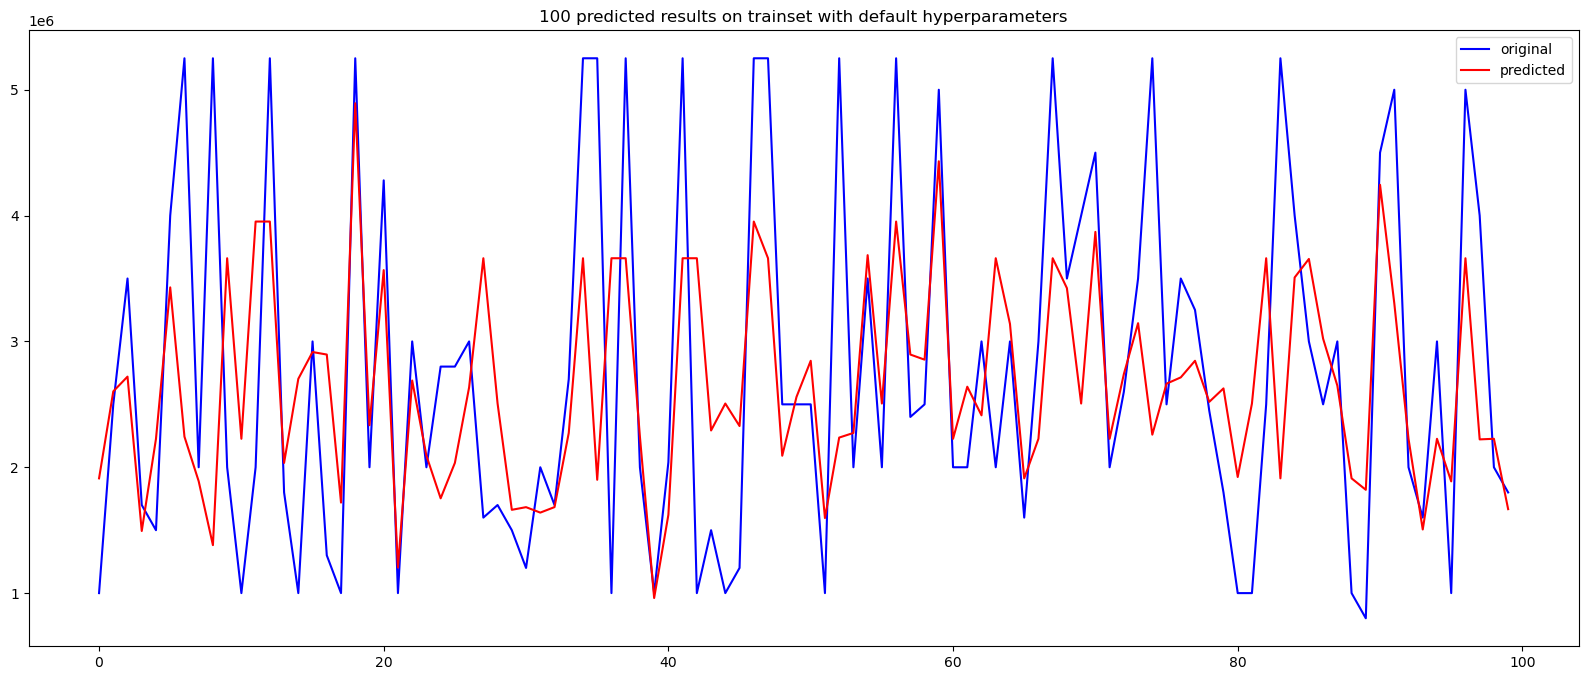

,model,parameters,set,RMSE,R-squared,MAPE,MAE
0,Light Gradient Boosting,default,trainset,1116307.68,0.35,2.53,827697.55


In [11]:
score = get_score('Light Gradient Boosting', 'default', 'trainset', y_train, y_pred_train)
evaluation = pd.concat([evaluation, score.T], ignore_index=True)
visualizing('default', 'trainset', y_train, y_pred_train)
score.T

#### Score and Visualize on Testset

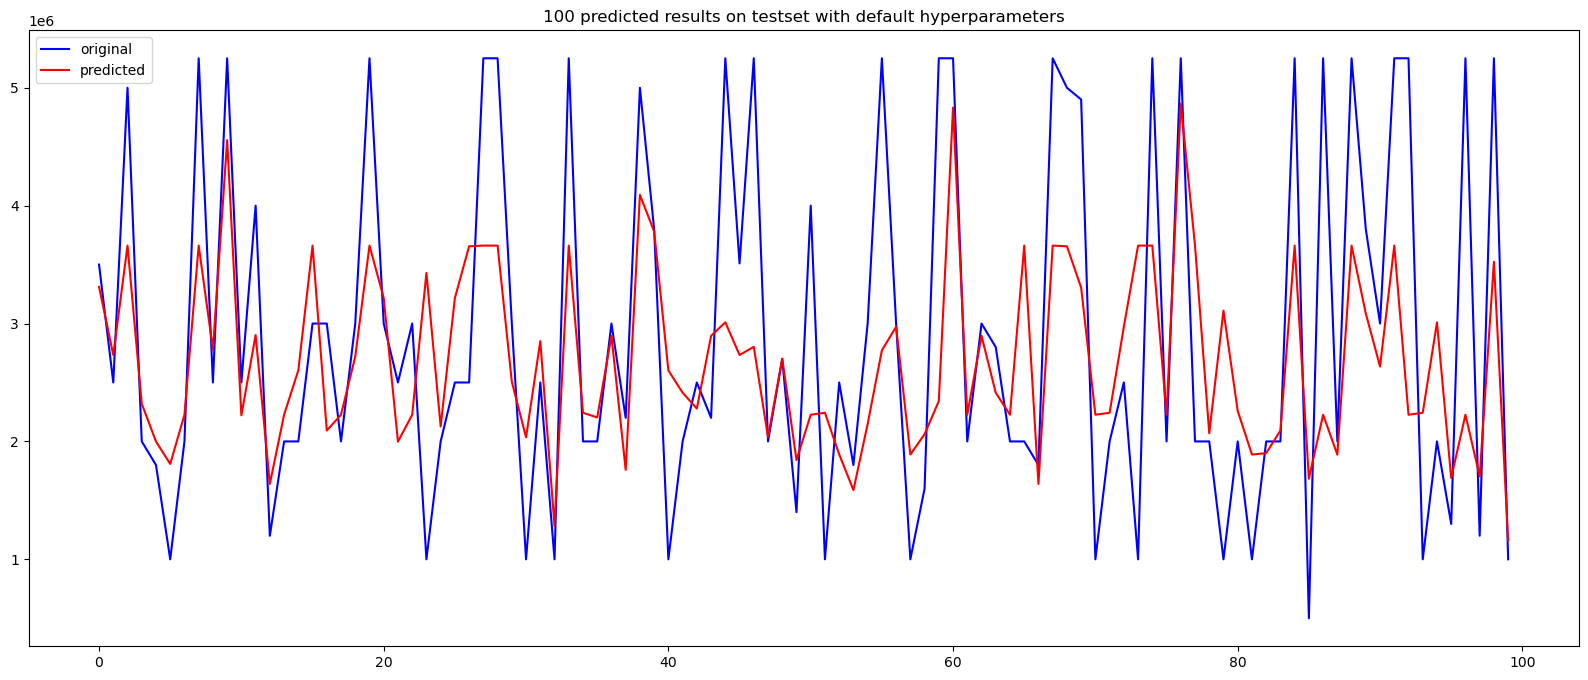

,model,parameters,set,RMSE,R-squared,MAPE,MAE
0,Light Gradient Boosting,default,testset,1162229.89,0.31,1.28,867972.47


In [12]:
score = get_score('Light Gradient Boosting', 'default', 'testset', y_test, y_pred_test)
evaluation = pd.concat([evaluation, score.T], ignore_index=True)
visualizing('default', 'testset', y_test, y_pred_test)
score.T

### Best Hyperparamaters

#### Find Best Hyperparameters

In [13]:
param_grid = {
    'max_depth' : [-1, 7, 15],
    'num_leaves' : [21, 31, 41], 
    'min_child_samples' : [4, 6, 8],
    'min_split_gain' : [0, 4, 8],
    'learning_rate' : [0.01],
    'n_estimators' : [100, 300 ,500],
}

grid_search = GridSearchCV(estimator=lgb.LGBMRegressor(), param_grid=param_grid)
grid_search.fit(X_train, y_train)
best_hyperparameters = grid_search.best_params_
print('Best hyperparameters:', best_hyperparameters)

Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 15, 'min_child_samples': 8, 'min_split_gain': 0, 'n_estimators': 500, 'num_leaves': 21}


In [14]:
lightgb  = lgb.LGBMRegressor(**best_hyperparameters)
y_pred_train, y_pred_test = get_predict_value(lightgb)

#### Score and Visualize results on Trainset

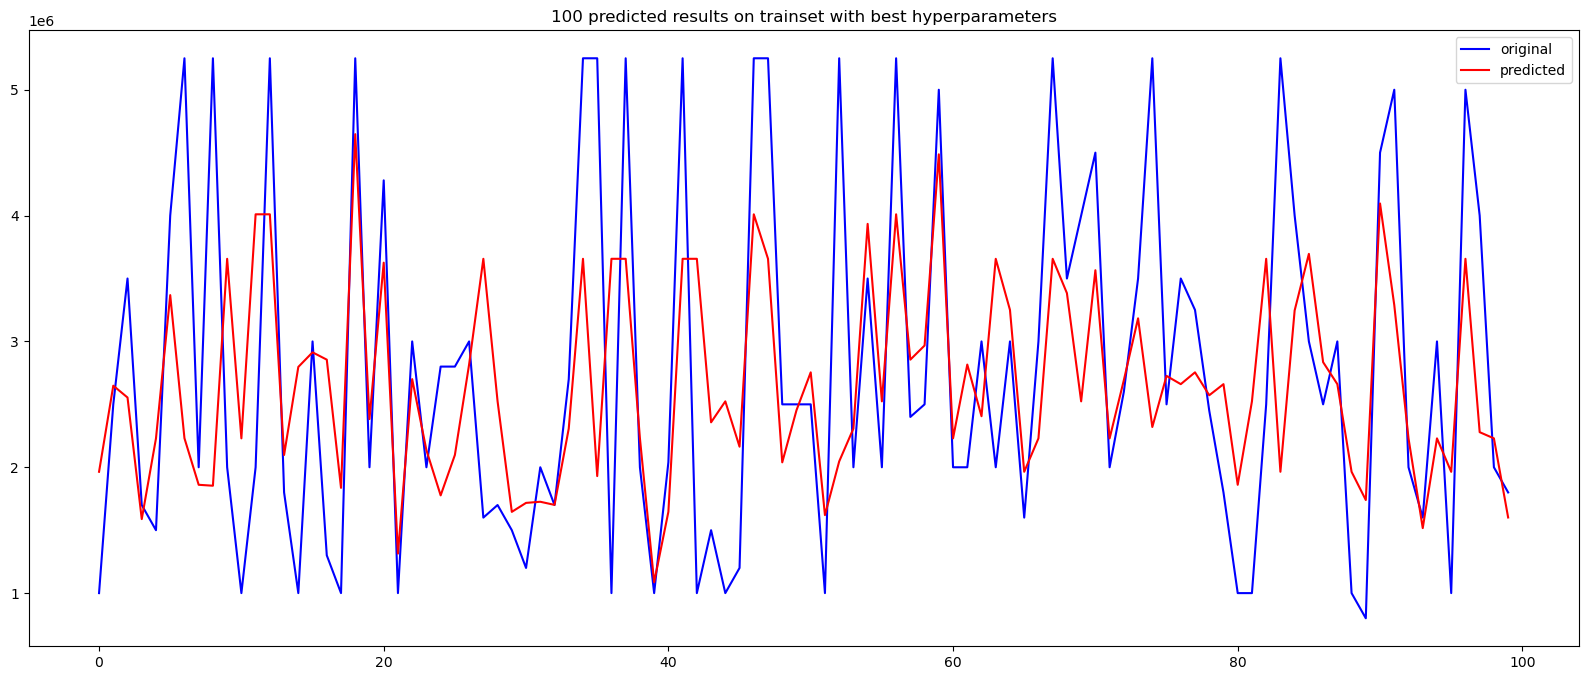

,model,parameters,set,RMSE,R-squared,MAPE,MAE
0,Light Gradient Boosting,best,trainset,1119162.97,0.34,2.51,834667.57


In [15]:
score = get_score('Light Gradient Boosting', 'best', 'trainset', y_train, y_pred_train)
evaluation = pd.concat([evaluation, score.T], ignore_index=True)
visualizing('best', 'trainset', y_train, y_pred_train)
score.T


#### Score and Visualize results on Testset

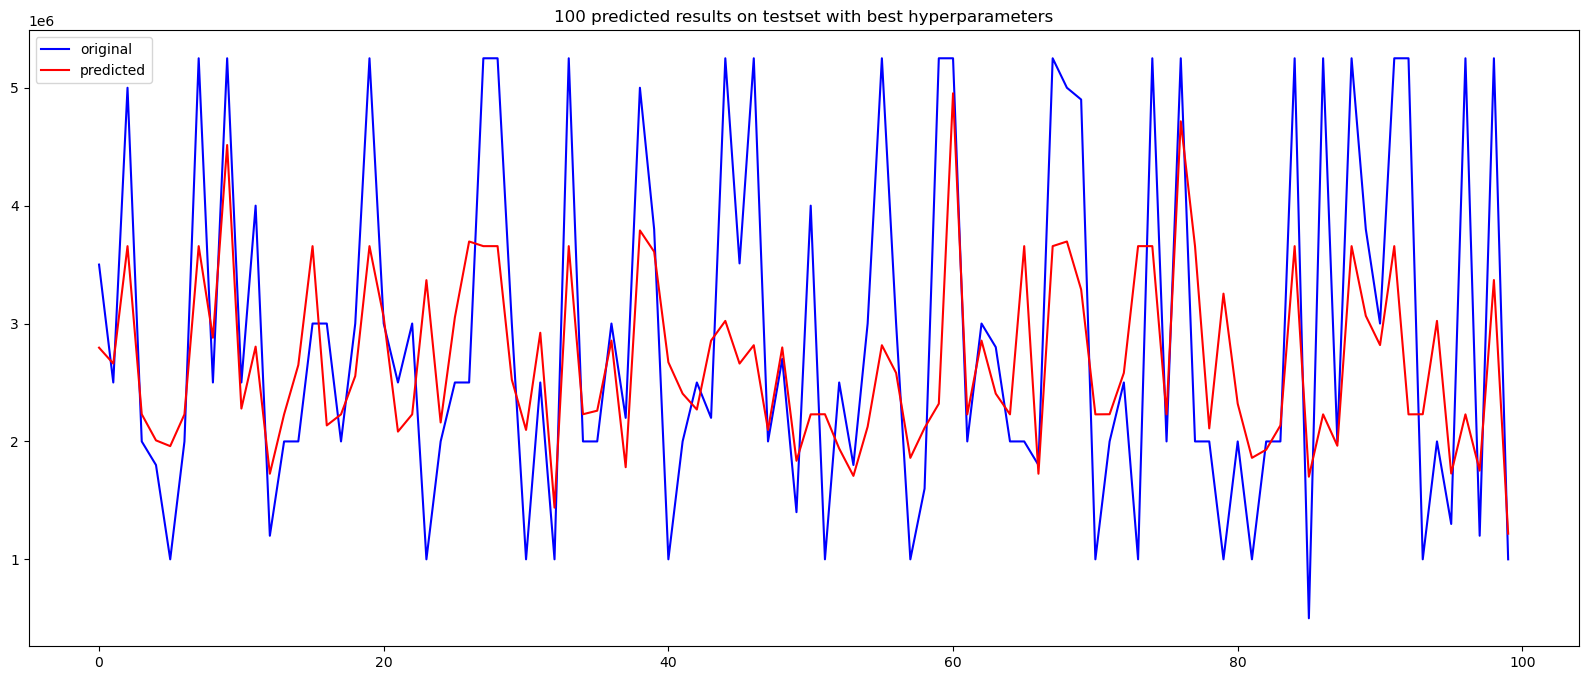

,model,parameters,set,RMSE,R-squared,MAPE,MAE
0,Light Gradient Boosting,best,testset,1158052.97,0.32,1.29,870600.93


In [16]:
score = get_score('Light Gradient Boosting', 'best', 'testset', y_test, y_pred_test)
evaluation = pd.concat([evaluation, score.T], ignore_index=True)
visualizing('best', 'testset', y_test, y_pred_test)
score.T

## Random Forest

### Default Hyperparameters

In [17]:
RF = RandomForestRegressor()
y_pred_train, y_pred_test = get_predict_value(RF)

#### Score and Visualize on Trainset

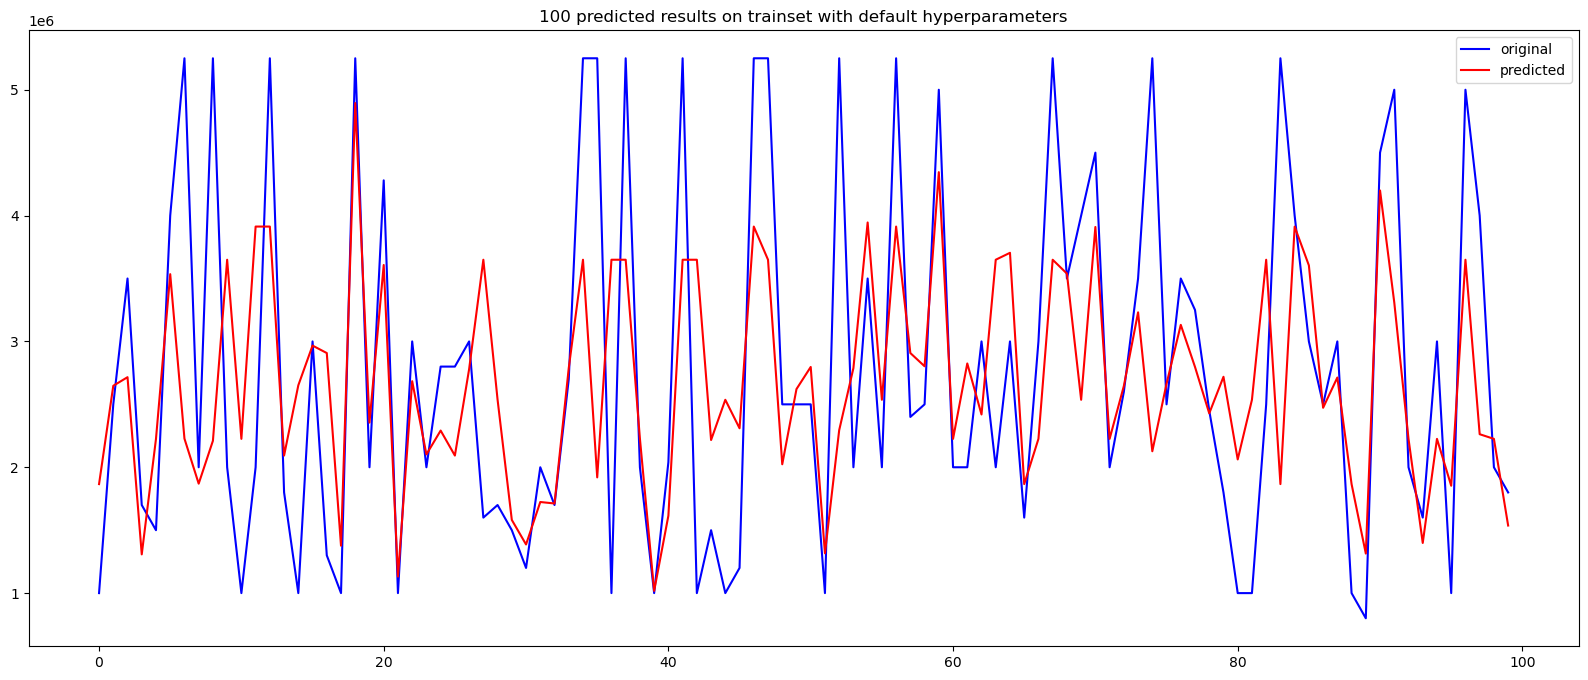

,model,parameters,set,RMSE,R-squared,MAPE,MAE
0,Random Forest,default,trainset,1085793.53,0.38,2.01,791101.72


In [18]:
score = get_score('Random Forest', 'default', 'trainset', y_train, y_pred_train)
evaluation = pd.concat([evaluation, score.T], ignore_index=True)
visualizing('default', 'trainset', y_train, y_pred_train)
score.T

#### Score and Visualize on Testset

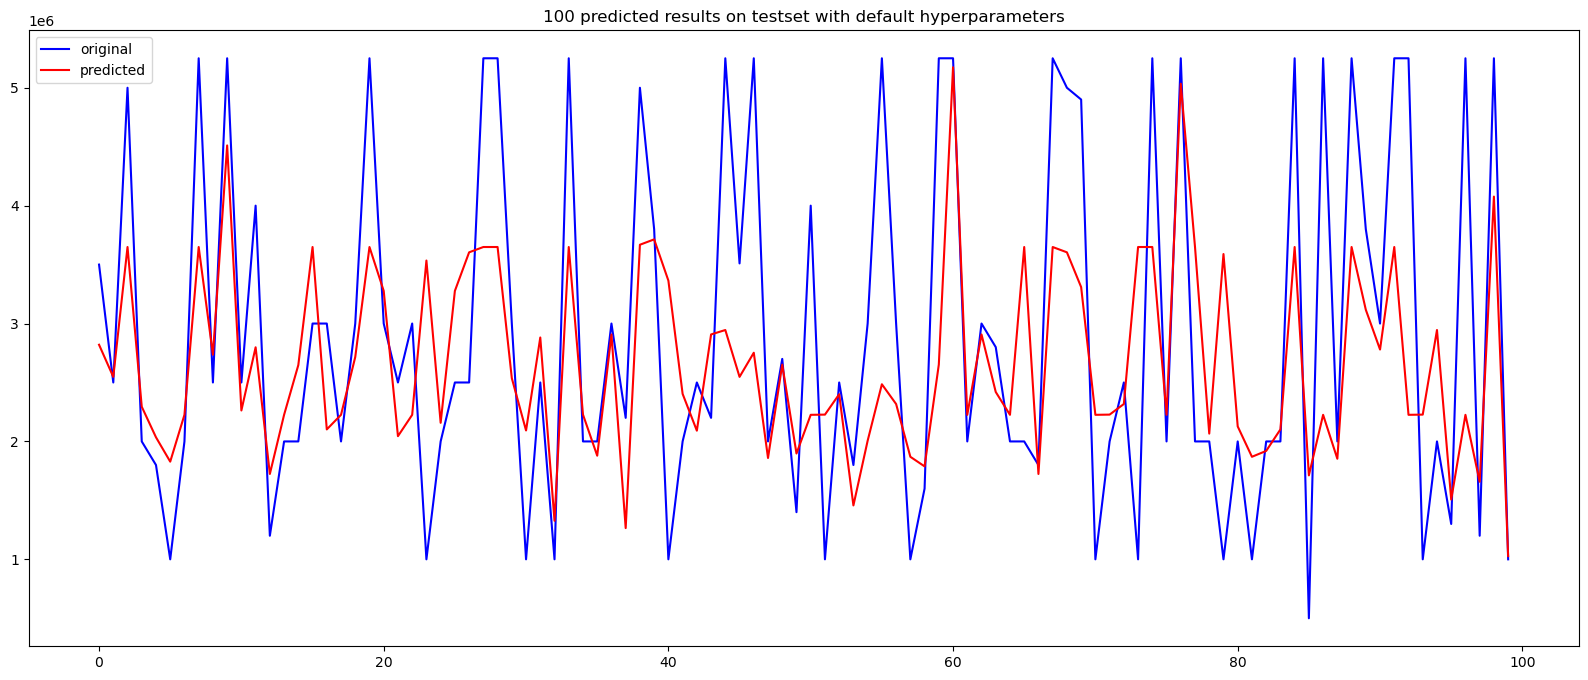

,model,parameters,set,RMSE,R-squared,MAPE,MAE
0,Random Forest,default,testset,1176814.46,0.30,1.12,874966.77


In [19]:
score = get_score('Random Forest', 'default', 'testset', y_test, y_pred_test)
evaluation = pd.concat([evaluation, score.T], ignore_index=True)
visualizing('default', 'testset', y_test, y_pred_test)
score.T

### Best Hyperparameters

#### Find Best Hyperparameters

In [20]:
param_grid = {
    'max_depth' : [None, 7, 10, 15],
    'min_samples_leaf' : range(1, 5, 1), 
    'min_samples_split' : [2, 4, 6],
    'n_estimators' : [100, 300, 600],
    'oob_score' : [True]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid)
grid_search.fit(X_train, y_train)
Hyperparameters = grid_search.best_params_
print('Hyperparameters:', Hyperparameters)

Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300, 'oob_score': True}


In [21]:
RF  = RandomForestRegressor(**Hyperparameters)
y_pred_train, y_pred_test = get_predict_value(RF)

#### Score and Visualize on Trainset

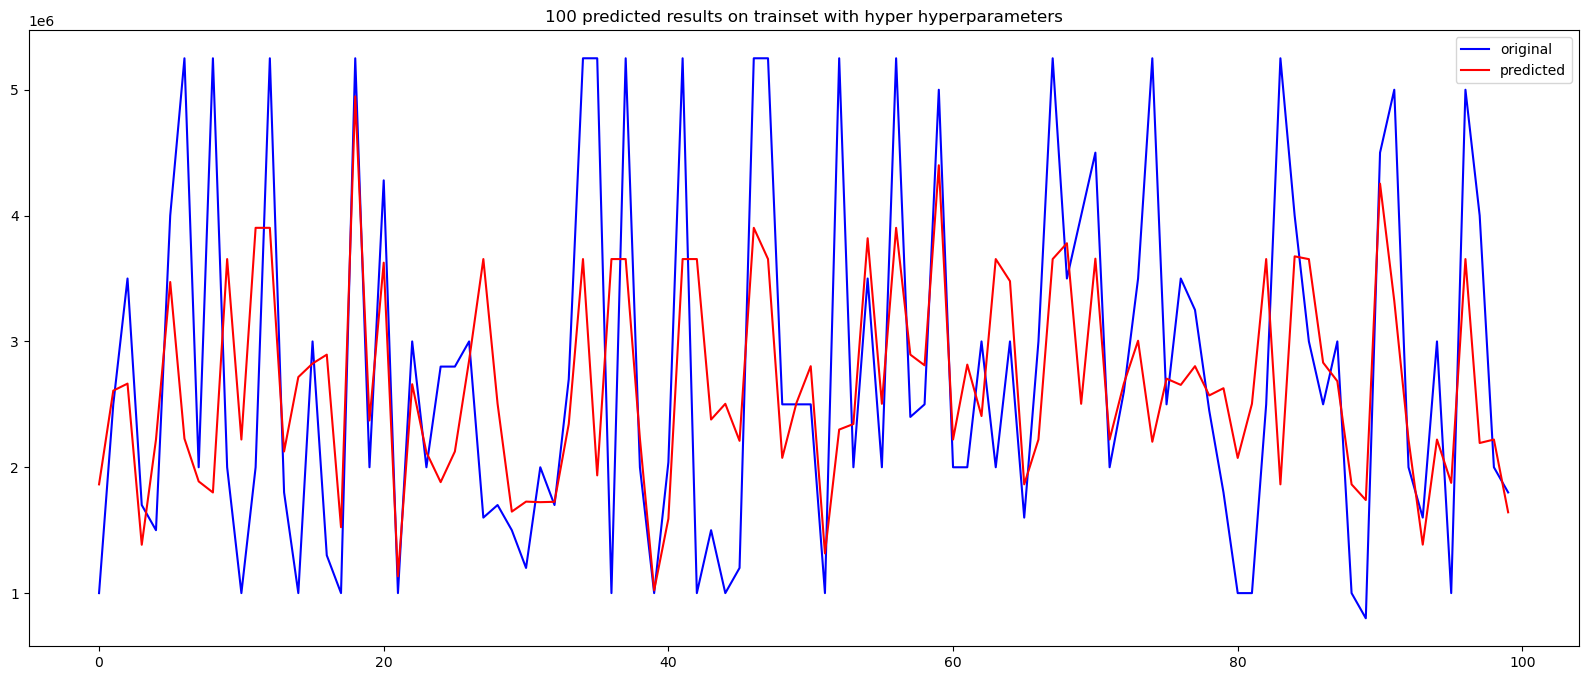

,model,parameters,set,RMSE,R-squared,MAPE,MAE
0,Random Forest,best,trainset,1116243.31,0.35,2.57,829534.90


In [22]:
score = get_score('Random Forest', 'best', 'trainset', y_train, y_pred_train)
evaluation = pd.concat([evaluation, score.T], ignore_index=True)
visualizing('hyper', 'trainset', y_train, y_pred_train)
score.T

#### Score and Visualize on Testset

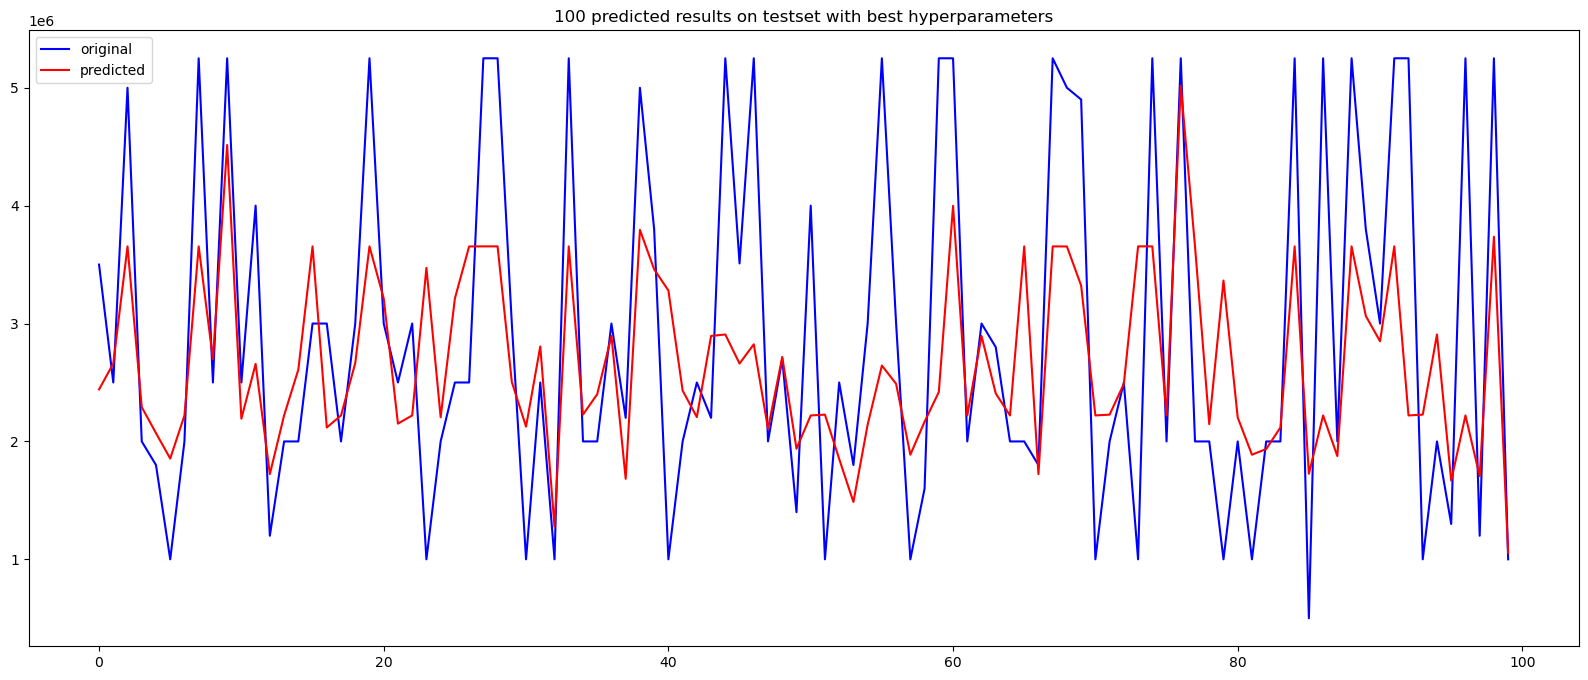

,model,parameters,set,RMSE,R-squared,MAPE,MAE
0,Random Forest,best,testset,1163531.16,0.31,1.26,874082.89


In [23]:
score = get_score('Random Forest', 'best', 'testset', y_test, y_pred_test)
evaluation = pd.concat([evaluation, score.T], ignore_index=True)
visualizing('best', 'testset', y_test, y_pred_test)
score.T

# Evaluation

In [24]:
evaluation

,model,parameters,set,RMSE,R-squared,MAPE,MAE
0,Light Gradient Boosting,default,trainset,1116307.68,0.35,2.53,827697.55
1,Light Gradient Boosting,default,testset,1162229.89,0.31,1.28,867972.47
2,Light Gradient Boosting,best,trainset,1119162.97,0.34,2.51,834667.57
3,Light Gradient Boosting,best,testset,1158052.97,0.32,1.29,870600.93
4,Random Forest,default,trainset,1085793.53,0.38,2.01,791101.72
5,Random Forest,default,testset,1176814.46,0.30,1.12,874966.77
6,Random Forest,best,trainset,1116243.31,0.35,2.57,829534.90
7,Random Forest,best,testset,1163531.16,0.31,1.26,874082.89


In [ ]:
evaluation.to_csv('./Results/Big_DS_evaluation.csv')

* Predicted results have not achieved high reliability
* Random Forest performs slightly better results than LightGBM
* Although with best hyperparameters, the performance decrease slightly, but it reduces overfitting cases